In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import statsmodels.api as sm
from sklearn.svm import LinearSVC
import math
import statistics
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, SpectralClustering
from scipy import stats

<h1><center>2. Active Learning Using Support Vector Machines </center></h1>

__2. (a) Download the banknote authentication data set. Choose 472 data points randomly as the test set and the remaining 900 points as the training set. This is a binary classification problem.__

In [2]:
df = pd.read_csv('Data\data_banknote_authentication.txt', header = None)
target = df.iloc[:,4]
df = df.drop(columns = 4)
traindf, testdf, traintarget, testtarget = train_test_split(df, target, test_size = 0.3440)

__2. (b) Repeat each of the following two procedures 50 times, giving 50 errors for 90 SVMs per each procedure.__

__2. (b) i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5 fold cross validation (see note on parameters). Repeat this process by adding 10 other randomly selected data points to the pool, until all 900 points are used. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. This will give 90 SVMs that were trained using 10, 20, 30, ... 900 data points and their 90 test errors. This is passive learning.__

In [3]:
Cgrid = []
a = np.arange(-6,9, dtype=float)
for i in a:
    b = 10**i
    Cgrid.append(b)
Lparameters = {'C' : Cgrid}

traindf2 = traindf
traintarget2 = traintarget

In [73]:
alltesterrors = []

for i in range (0,8):
    traindf2 = traindf
    testerrors = []


    sampletraindf = traindf2.sample(0)

    while len(traindf2) > 0:
        newsample = traindf2.sample(10)
        sampletraindf = pd.concat([sampletraindf, newsample])
        sampletraintarget = traintarget.loc[sampletraindf.index]

        traindf2 = traindf2.drop(index = newsample.index)

        svm2 = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000)
        svm2.fit(sampletraindf, sampletraintarget)

        gridsearch = GridSearchCV(svm2, param_grid = Lparameters, n_jobs = -1, cv=5)
        gridsearch.fit(sampletraindf, sampletraintarget)
        bestsvm = gridsearch.best_estimator_

        testerror = bestsvm.score(testdf, testtarget)
        testerrors.append(testerror)

    alltesterrors.append(testerrors)

    #print(alltesterrors[i])


    #sampletraindf = pd.concat([sampletraindf, sampletraindf2])
    #sampletraintarget = pd.concat([sampletraintarget, sampletraintarget2])
    
    

C:\Users\chans\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\chans\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\chans\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\chans\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\chans\anaconda3\lib\site-packages\s

__2. (b) ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty (see note on selection). Select the parameters of the SVM with 5 fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. This will give 90 SVMs that were trained using 10, 20, 30, ... 900 data points and their 90 test errors. This is active learning.__

traindf3 = traindf
testerrorsB = []
lenB = []

sampletraindfB = traindf3.sample(10)
sampletraintargetB = traintarget.loc[sampletraindfB.index]

svm3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000)
svm3.fit(sampletraindfB, sampletraintargetB)

gridsearchB = GridSearchCV(svm3, param_grid = Lparameters, n_jobs = -1, cv=5)
gridsearchB.fit(sampletraindfB, sampletraintargetB)
bestsvmB = gridsearchB.best_estimator_

svmdecfunc = bestsvmB.decision_function(traindf3)
svmdecfunc2 = np.absolute(svmdecfunc)
svmdecfunc2DF = pd.DataFrame(data = svmdecfunc2, index = traindf3.index)
sortedsvmdecfunc2DF = svmdecfunc2DF.sort_values(by=[0], axis=0)
newsampleBpoints = sortedsvmdecfunc2DF.iloc[0:10]
indices = newsampleBpoints.index.values
newsampleB = traindf3.loc[indices]

In [91]:
alltesterrorsB = []

for i in range(0,2):
    traindf3 = traindf
    testerrorsB = []
    lenB = []

    sampletraindfB = traindf3.sample(10)
    sampletraintargetB = traintarget.loc[sampletraindfB.index]

    svm3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000)
    svm3.fit(sampletraindfB, sampletraintargetB)

    gridsearchB = GridSearchCV(svm3, param_grid = Lparameters, n_jobs = -1, cv=5)
    gridsearchB.fit(sampletraindfB, sampletraintargetB)
    bestsvmB = gridsearchB.best_estimator_

    while len(traindf3) > 0:

        svmdecfunc = bestsvmB.decision_function(traindf3)
        svmdecfunc2 = np.absolute(svmdecfunc)
        svmdecfunc2DF = pd.DataFrame(data = svmdecfunc2, index = traindf3.index)
        sortedsvmdecfunc2DF = svmdecfunc2DF.sort_values(by=[0], axis=0)
        newsampleBpoints = sortedsvmdecfunc2DF.iloc[0:10]
        indices = newsampleBpoints.index.values
        newsampleB = traindf3.loc[indices]



        sampletraindfB = pd.concat([sampletraindfB, newsampleB])
        sampletraintargetB = traintarget.loc[sampletraindfB.index]

        traindf3 = traindf3.drop(index = newsampleB.index)

        svm3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000)
        svm3.fit(sampletraindfB, sampletraintargetB)

        gridsearchB = GridSearchCV(svm3, param_grid = Lparameters, n_jobs = -1, cv=5)
        gridsearchB.fit(sampletraindfB, sampletraintargetB)
        bestsvmB = gridsearchB.best_estimator_

        testerrorB = bestsvmB.score(testdf, testtarget)
        testerrorsB.append(testerrorB)
        length = len(sampletraindfB)
        lenB.append(length)
    alltesterrorsB.append(testerrorsB)


C:\Users\chans\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [135]:
more = [0]*4600

for j in range (len(alltesterrors[0])):
    something = []
    for i in range(len(alltesterrors)):
        something.append(alltesterrors[i][j])
    more[j] = something
more = [i for i in more if i != 0]

means = []
for i in range(len(more)):
    mean = np.mean(more[i])
    means.append(mean)

moreB = [0]*4600

for j in range (len(alltesterrorsB[0])):
    somethingB = []
    for i in range(len(alltesterrorsB)):
        somethingB.append(alltesterrorsB[i][j])
    moreB[j] = somethingB
moreB = [i for i in moreB if i != 0]

meansB = []
for i in range(len(moreB)):
    meanB = np.mean(moreB[i])
    meansB.append(meanB)
    
xaxis = np.arange(0,90,1)
plt.plot(xaxis, meansB)
plt.plot(xaxis, means)
plt.show()

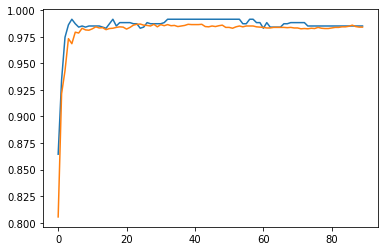

__2. (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in parts ii and iii. This is effectively a Monte-Carlo simulation. Plot average test error versus number of training instances for both active and passive leaners on the same figure and report conclusions. Here, a learning curve is obtained by Monte-Carlo simulation.__